## California housing model

In [28]:
import tarfile
import urllib.request
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

In [29]:
def load_housingdata():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.exists():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        print("Downloaded housing dataset.")
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
            print("Extracted housing dataset.")
    housing_csv_path = Path("datasets/housing/housing.csv")
    return pd.read_csv(housing_csv_path)

housing_df = load_housingdata()
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [30]:

housing_df.info()
housing_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [31]:
housing_df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

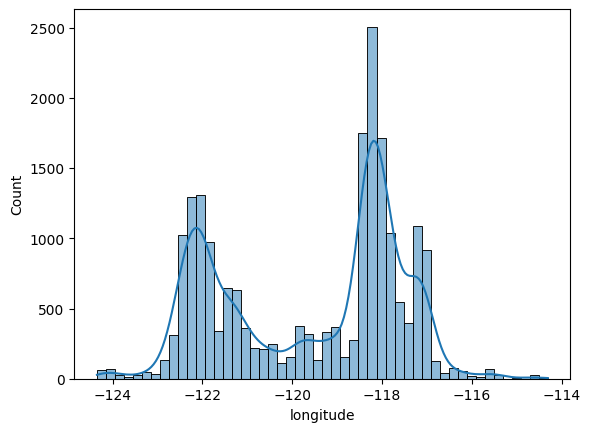

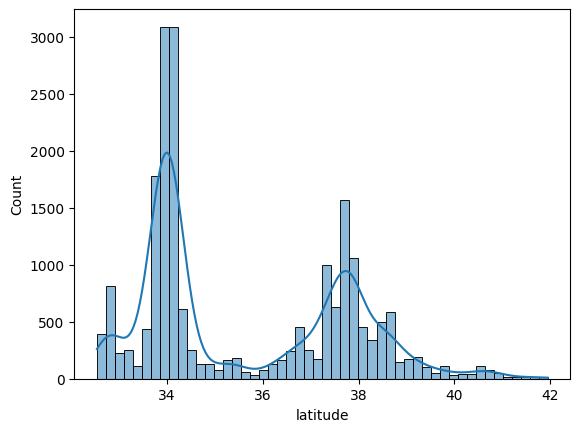

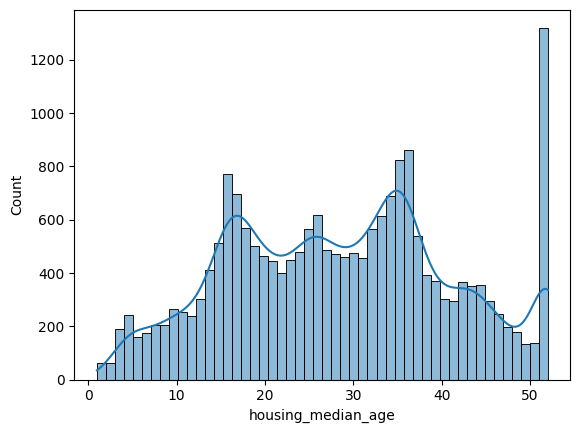

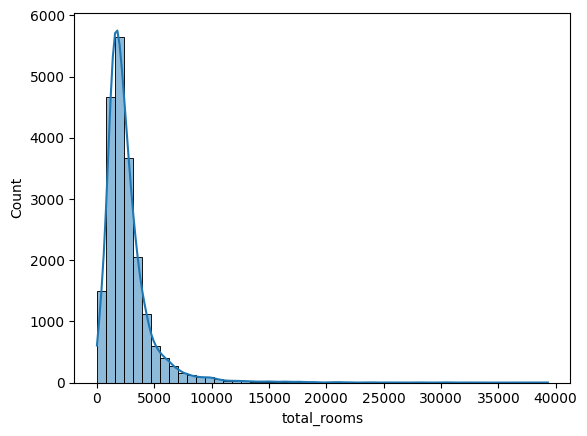

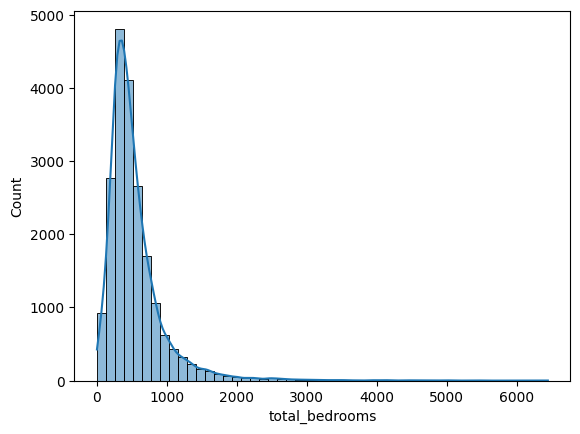

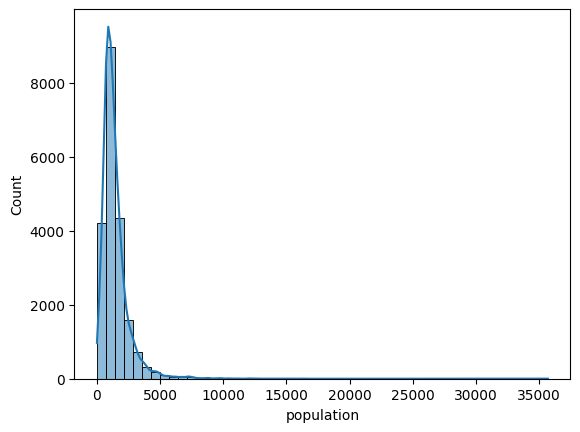

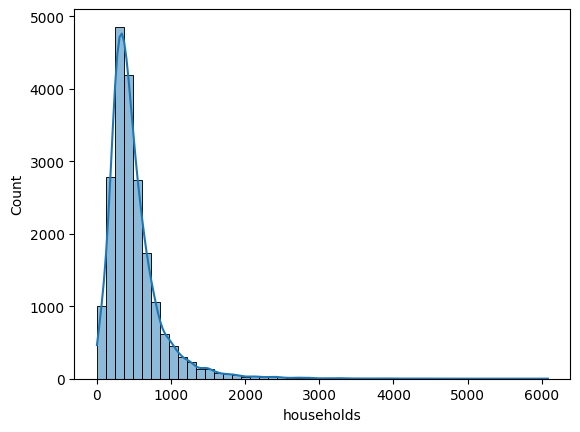

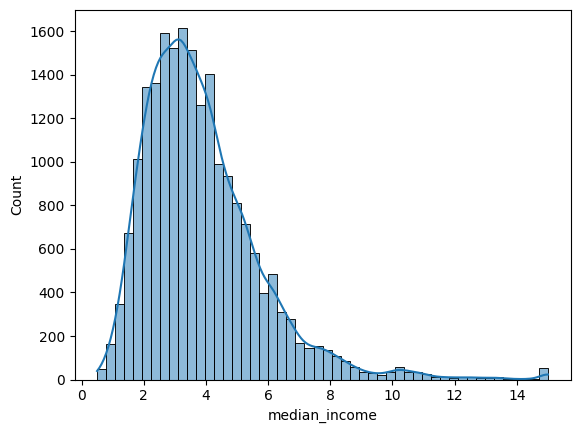

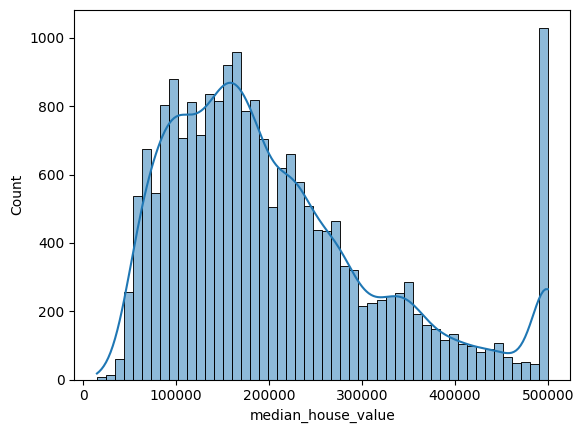

In [32]:
# housing_df.hist(bins=50, figsize=(20,15))
# plt.show()
numeric_columns_df = housing_df.select_dtypes(include=[np.number])
numeric_columns = numeric_columns_df.columns

for i, column in enumerate(numeric_columns, 1):
    sns.histplot(data=housing_df[column], bins=50, kde=True)
    plt.show()

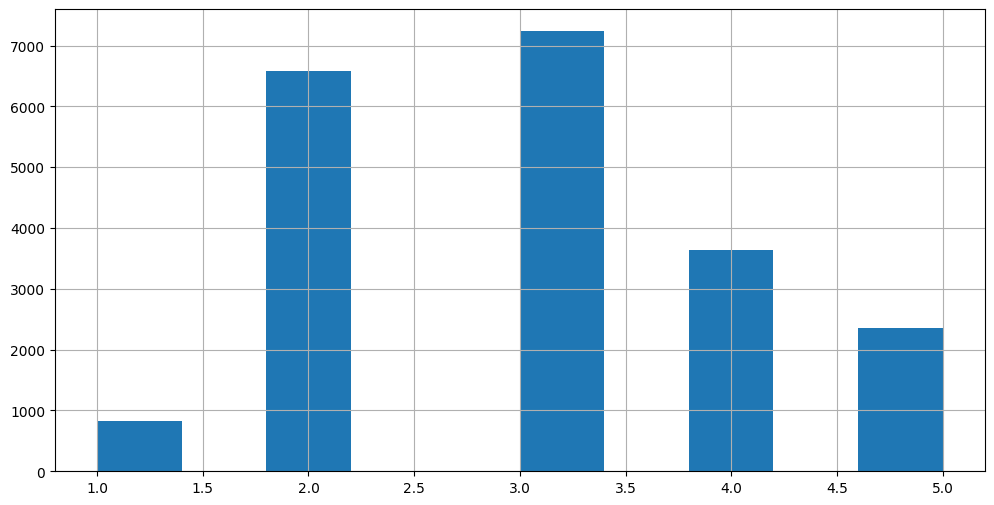

In [33]:
housing_df['income_cat'] = pd.cut(
    housing_df['median_income'],
    bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf],
    labels=[1, 2, 3, 4, 5]
)

plt.subplots( 1, 1, figsize=(12, 6))
housing_df['income_cat'].hist()
plt.show()

In [34]:
strat_train_set, strat_test_set = train_test_split(
    housing_df,
    test_size=0.2,
    stratify=housing_df['income_cat'],
    random_state=42
)

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [35]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

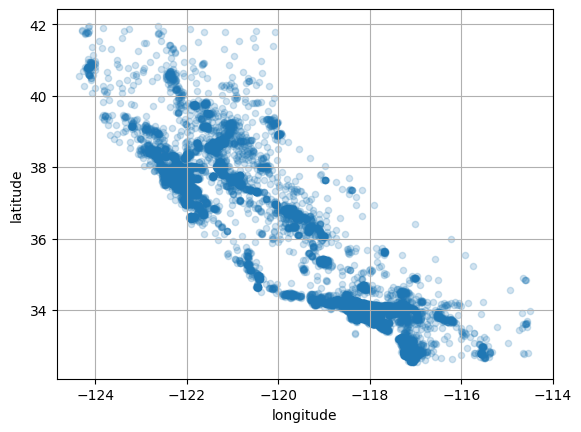

In [36]:
housing_c = strat_train_set.copy()
housing_c.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2, grid=True)
plt.show()

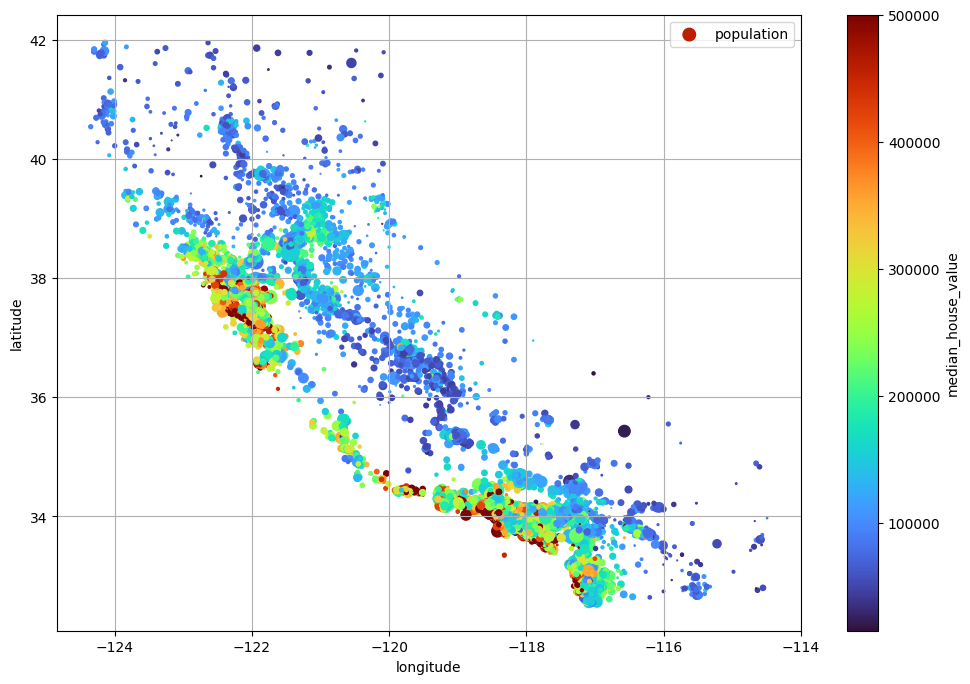

In [37]:
housing_c.plot(kind="scatter", x="longitude", y="latitude", grid=True,
                s=housing_c["population"]/100, label="population",
                c="median_house_value", cmap=plt.get_cmap("turbo"), colorbar=True,
                legend=True, sharex=False, figsize=(12,8))
plt.show()

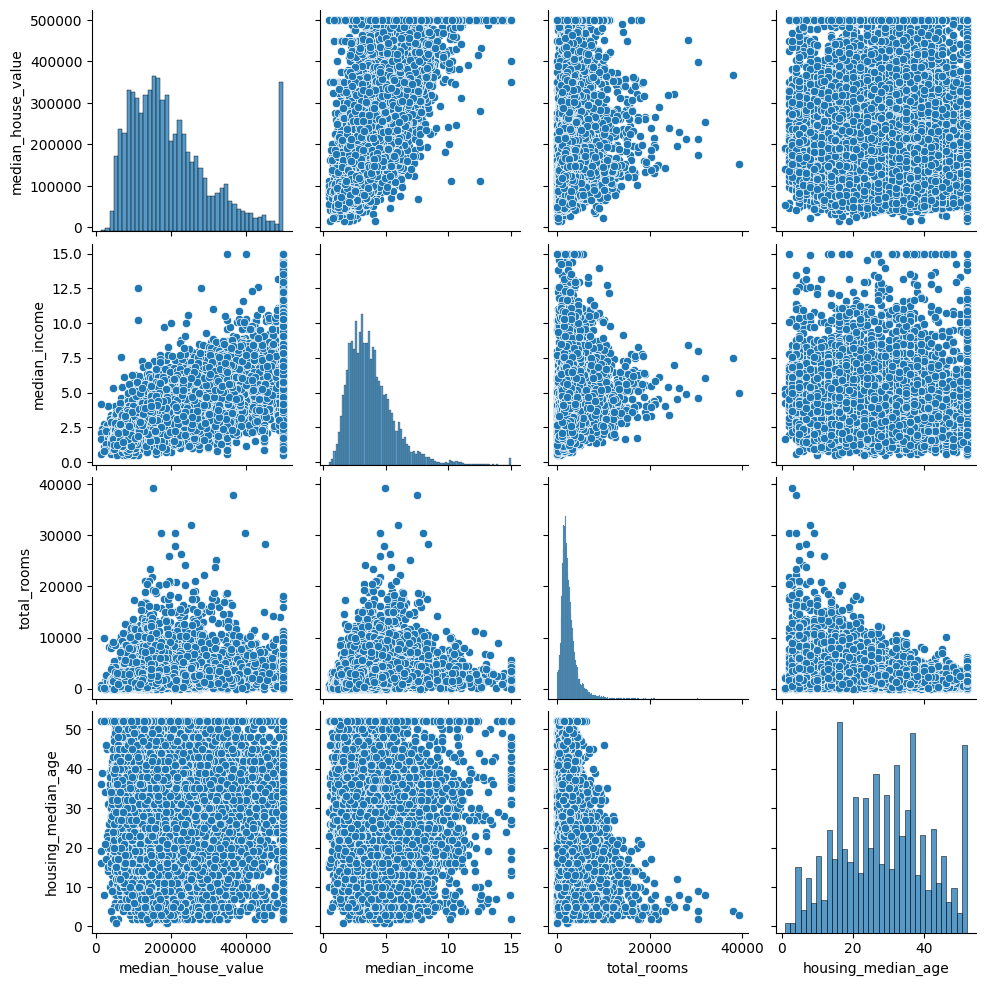

In [38]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

sns.pairplot(housing_c[attributes])

# Display the plot
plt.show()

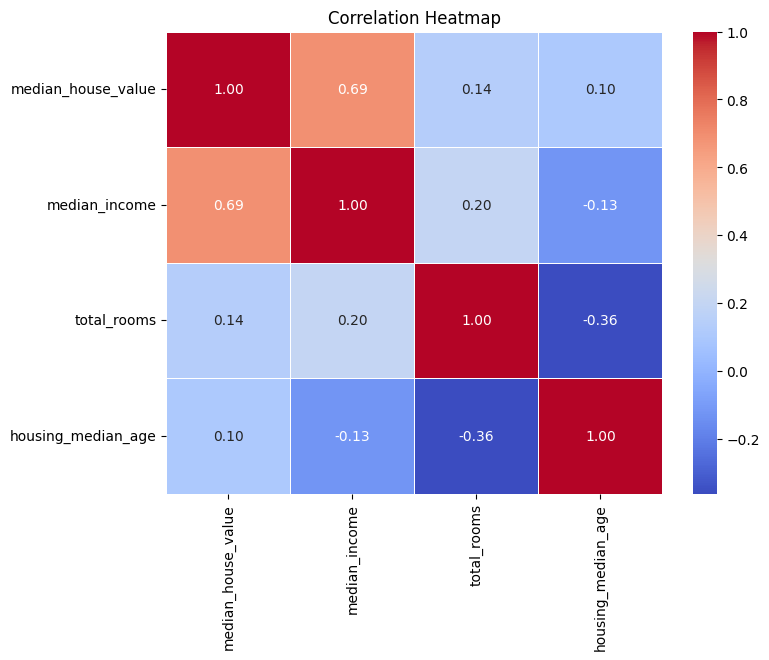

In [39]:
corr_matrix_numeric_columns = housing_c[attributes].corr()

plt.figure(figsize=(8, 6))

# 4. Plot the heatmap using Seaborn
sns.heatmap(corr_matrix_numeric_columns, 
            annot=True,      # Annotate cells with correlation values
            cmap='coolwarm', # Choose a color map (e.g., 'coolwarm', 'viridis')
            fmt=".2f",       # Format annotations to 2 decimal places
            linewidths=0.5   # Add lines to divide cells
           )

plt.title("Correlation Heatmap")
plt.show()

In [40]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [41]:

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.preprocessing import OneHotEncoder

from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, random_state=None, gamma=1.0):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.gamma = gamma
        self.kmeans = KMeans(n_clusters=self.n_clusters, random_state=self.random_state)

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans.fit(X, sample_weight=sample_weight)
        return self

    def transform(self, X):
        return rbf_kernel(X, self.kmeans.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, input_features=None):
        return [f"cluster {i} similarity" for i in range(self.n_clusters)]

def column_ratio(x):
    return x[:, [0]] / x[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

logging_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

cluster_simil = ClusterSimilarity(n_clusters=10, random_state=42, gamma=1.0)

default_num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())

preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_household", ratio_pipeline(), ["population", "households"]),
    ("log", logging_pipeline, ["total_bedrooms", "total_rooms", "population", "households", "median_income"]),
    ("geo", cluster_simil, ["longitude", "latitude"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object))
], remainder=default_num_pipeline)

In [42]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

In [43]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_household__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__cluster 0 similarity',
       'geo__cluster 1 similarity', 'geo__cluster 2 similarity',
       'geo__cluster 3 similarity', 'geo__cluster 4 similarity',
       'geo__cluster 5 similarity', 'geo__cluster 6 similarity',
       'geo__cluster 7 similarity', 'geo__cluster 8 similarity',
       'geo__cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_reg = make_pipeline(
    preprocessing,
    LinearRegression()
)
lin_reg.fit(housing, housing_labels)
housing_predictions = lin_reg.predict(housing)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
print("RMSE:", np.sqrt(lin_mse))

mean_avg_error = np.mean(np.abs(housing_predictions - housing_labels))
print("MAE:", mean_avg_error)

RMSE: 68972.88910758452
MAE: 51301.0044458925


In [45]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(
    preprocessing,
    DecisionTreeRegressor(random_state=42)
)
tree_reg.fit(housing, housing_labels)
housing_predictions_tree = tree_reg.predict(housing)
tree_mse = mean_squared_error(housing_labels, housing_predictions_tree)
print("RMSE:", np.sqrt(tree_mse))
mean_avg_error_tree = np.mean(np.abs(housing_predictions_tree - housing_labels))
print("MAE:", mean_avg_error_tree)

RMSE: 0.0
MAE: 0.0


In [47]:
from sklearn.model_selection import cross_val_score
scores = -cross_val_score(
    tree_reg,
    housing,
    housing_labels,
    scoring="neg_root_mean_squared_error",
    cv=10
)

print("Scores:", scores)
print("Mean:", scores.mean())

Scores: [64607.89604624 66409.0627187  66203.41031283 65863.76434319
 68086.79141027 66534.53308312 66923.49892937 68532.21066423
 66367.48227837 66208.69621463]
Mean: 66573.73460009348


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = make_pipeline(
    preprocessing,
    RandomForestRegressor(random_state=42)
)
forest_rmse_scores = -cross_val_score(
    forest_reg,
    housing,
    housing_labels,
    scoring="neg_root_mean_squared_error",
    cv=10
)
print("Scores:", forest_rmse_scores)
print("Mean:", forest_rmse_scores.mean())

Scores: [46576.85817312 47238.61187815 45495.97664925 46488.27129295
 45911.17628527 47730.60806253 47561.15494003 49140.83221016
 47121.06435179 47116.37414628]
Mean: 47038.09279895258


In [ ]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42))
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
    'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
    'random_forest__max_features': [6, 8, 10]},
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"[{'preprocessing__geo__n_clusters': [5, 8, ...], 'random_forest__max_features': [4, 6, ...]}, {'preprocessing__geo__n_clusters': [10, 15], 'random_forest__max_features': [6, 8, ...]}]"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('bedrooms', ...), ('rooms_per_house', ...), ...]"


In [ ]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [ ]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,10.292507,0.965225,0.164285,0.002938,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-42725.423800,-43708.197434,-44334.935606,-43589.518946,662.417543,1
13,14.025353,1.996004,0.226480,0.040759,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-43486.175916,-43819.842374,-44899.968680,-44068.662323,603.399271,2
6,8.105849,0.142929,0.231984,0.001934,10,4,"{'preprocessing__geo__n_clusters': 10, 'random...",-43797.854175,-44036.240246,-44960.694004,-44264.929475,501.513170,3
9,14.398225,3.974331,0.264121,0.083238,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-43709.661050,-44163.463178,-44966.539107,-44279.887778,519.680433,4
7,11.885352,0.523488,0.240539,0.025509,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-43709.661050,-44163.463178,-44966.539107,-44279.887778,519.680433,4
14,17.811009,1.847737,0.212763,0.020285,15,10,"{'preprocessing__geo__n_clusters': 15, 'random...",-44350.273180,-44485.169004,-45211.211272,-44682.217819,378.087094,6
3,8.616109,0.284040,0.245921,0.008608,8,4,"{'preprocessing__geo__n_clusters': 8, 'random_...",-44511.046790,-44519.243029,-45214.107933,-44748.132584,329.511319,7
10,13.476036,0.891266,0.199532,0.043493,10,8,"{'preprocessing__geo__n_clusters': 10, 'random...",-44498.988402,-44883.300454,-45264.655671,-44882.314842,312.583131,8
8,16.691502,1.605912,0.321681,0.101431,10,8,"{'preprocessing__geo__n_clusters': 10, 'random...",-44498.988402,-44883.300454,-45264.655671,-44882.314842,312.583131,8
4,11.113520,0.259273,0.222916,0.006448,8,6,"{'preprocessing__geo__n_clusters': 8, 'random_...",-44851.823543,-44827.316247,-45654.572385,-45111.237392,384.326110,10


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'preprocessing__geo__n_clusters': randint(low=3, high=50),
    'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline,
    param_distributions=param_distribs,
    n_iter=10,
    cv=3,
    scoring='neg_root_mean_squared_error',
    random_state=42
)
rnd_search.fit(housing, housing_labels)
rnd_search.best_params_

{'preprocessing__geo__n_clusters': 45, 'random_forest__max_features': 9}

In [ ]:
final_model = rnd_search.best_estimator_
feature_importances = final_model.named_steps['random_forest'].feature_importances_
feature_names = final_model.named_steps['preprocessing'].get_feature_names_out()
sorted(zip(feature_importances, feature_names), reverse=True)

[(np.float64(0.18599734460509473), 'log__median_income'),
 (np.float64(0.07338850855844488), 'cat__ocean_proximity_INLAND'),
 (np.float64(0.06556941990883974), 'bedrooms__ratio'),
 (np.float64(0.05364871007672531), 'rooms_per_house__ratio'),
 (np.float64(0.04598870861894748), 'people_per_household__ratio'),
 (np.float64(0.04175269214442518), 'geo__cluster 30 similarity'),
 (np.float64(0.025976797232869678), 'geo__cluster 25 similarity'),
 (np.float64(0.023595895886342252), 'geo__cluster 36 similarity'),
 (np.float64(0.02021056221732893), 'geo__cluster 9 similarity'),
 (np.float64(0.018606917076661445), 'geo__cluster 34 similarity'),
 (np.float64(0.01813798837462886), 'geo__cluster 37 similarity'),
 (np.float64(0.017404353166326745), 'geo__cluster 18 similarity'),
 (np.float64(0.01677838614384489), 'geo__cluster 1 similarity'),
 (np.float64(0.015459009666188978), 'geo__cluster 7 similarity'),
 (np.float64(0.015325731028175922), 'geo__cluster 32 similarity'),
 (np.float64(0.0150737720150

In [ ]:
from sklearn.metrics import root_mean_squared_error

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
final_predictions = final_model.predict(X_test)
final_rmse = root_mean_squared_error(y_test, final_predictions)
print("Final RMSE on Test Set:", final_rmse)

Final RMSE on Test Set: 41445.533268606625


In [ ]:
import joblib
joblib.dump(final_model, "housing_model.pkl")

['housing_model.pkl']